<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Import the required libraries


In [131]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score


## Importing the Dataset


Reading the chosen dataset into pandas dataframe:


In [132]:
data = pd.read_csv('/Users/canmizrakli/Desktop/CMPE442/assignment 2 - submit to coursera/mushroom_cleaned.csv') # Kaggle Link to dataset: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


The goal for this final project is to classify mushrooms as poisonous or non-poisonous (edible) using parameters like cap diameter, cap shape, gill attachment, gill color, stem height, stem width and stem color. Main objective is to select the best classification model for this dataset and features that give the most accurate results.

# 1. About the Data


This dataset focuses on classification of mushrooms and the factors that affect this classification. The dataset contains the following columns: 'cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',  'stem-height', 'stem-width' and 'stem-color'. The columns until mainroad are integer values, while the remaining are binary values. The target variable is 'class', which is a binary value that determines if a mushroom is poisonous or not, 0 refers to edible and 1 refers to poisonous.

In [133]:
data.info()    # Display the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In order to get to know the data beter, here are some statistics and visual representations.

In [134]:
summary_stats = data.describe()

summary_stats

# The summary statistics of the dataset are displayed above.

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [135]:
print(data.describe())

       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000      0.027372      0.000000

In [136]:
data.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [137]:
data.shape

(54035, 9)

In [138]:
class_counts = data['class'].value_counts()

print(class_counts)

class
1    29675
0    24360
Name: count, dtype: int64


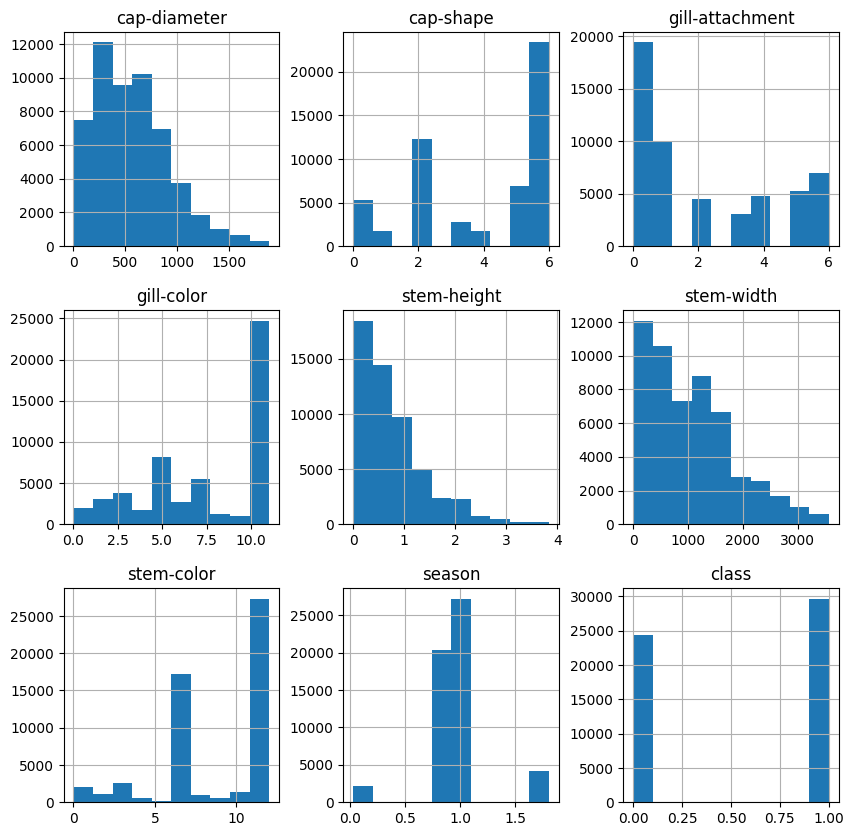

In [139]:
data.hist(figsize=(10,10))
plt.show()

The first heat map shows the correlation between each feature but we clip it so that we see each features correlation between the target "class".

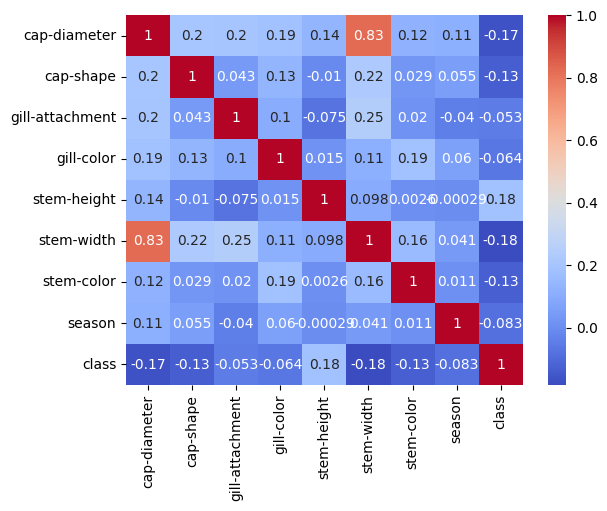

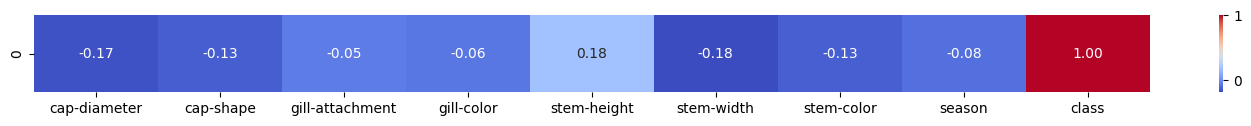

In [140]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Calculate correlation
correlation = data.corrwith(data['class']).to_frame().T

# Set up the matplotlib figure, adjust the size as needed
f, ax = plt.subplots(figsize=(18, 1))

# Draw the heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# Show the plot
plt.show()

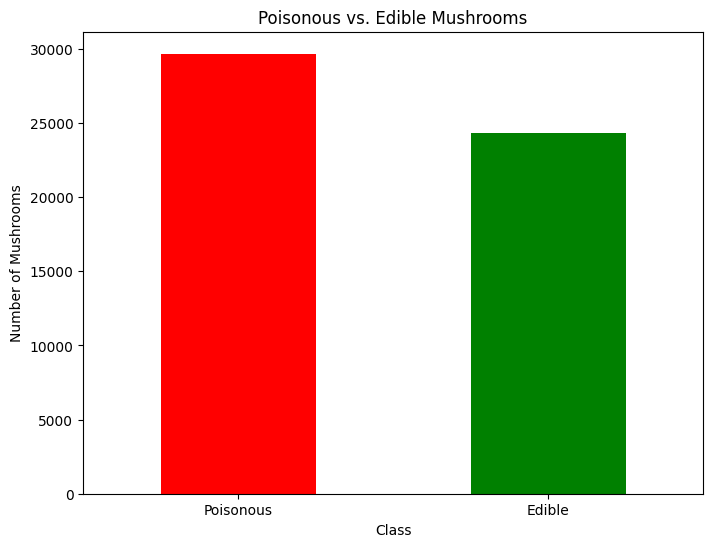

In [141]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Poisonous vs. Edible Mushrooms')
plt.xlabel('Class')
plt.ylabel('Number of Mushrooms')
plt.xticks([1, 0], ['Edible', 'Poisonous'], rotation=0)
plt.show()

# Pre-processing: Feature selection/extraction

The dataset is already cleaned so there is no need to drop any columns.

In [142]:
data.head()    # Display the first five rows of the dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Now we seperate our train and test sets for further applications.

In [143]:
X = data.drop('class', axis=1)    # Define the feature matrix X
y = data['class']    # Define the target variable y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Train set: ", X_train.shape, y_train.shape) 
print("Test set: ", X_test.shape, y_test.shape)

Training set has 37824 samples.
Testing set has 16211 samples.
Train set:  (37824, 8) (37824,)
Test set:  (16211, 8) (16211,)


# 2. Objectives


For the model testing we will be working with four different models:

1. Logistic Regression: Used to model the relationship between the features of the dataset and the binary outcome.

2. Decision Trees: Used to create a model that predicts outcomes based on a series of decision rules, providing an interpretable tree structure that shows the importance and relationships of features and is easy to read and understand.

3. K-NN: Used to classify new data points based on their similarity to known data (Kth nearest neighbors of the data point) in the dataset.

4. SVM: Used to find a hyperplane that classifies the data points in the dataset, leads to better generalization.

# 3. Classification Models


1. Logistic Regression

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model_log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
model_log_reg.fit(X_train, y_train)

y_pred_log_reg = model_log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg*100:.2f}%")
print()

# Print classification report
print(classification_report(y_test, y_pred_log_reg))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Accuracy: 63.49%

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      7349
           1       0.65      0.72      0.68      8862

    accuracy                           0.63     16211
   macro avg       0.63      0.63      0.63     16211
weighted avg       0.63      0.63      0.63     16211

Confusion Matrix:
[[3926 3423]
 [2496 6366]]


The visual representation of the confusion matrix is shown in the below figure.

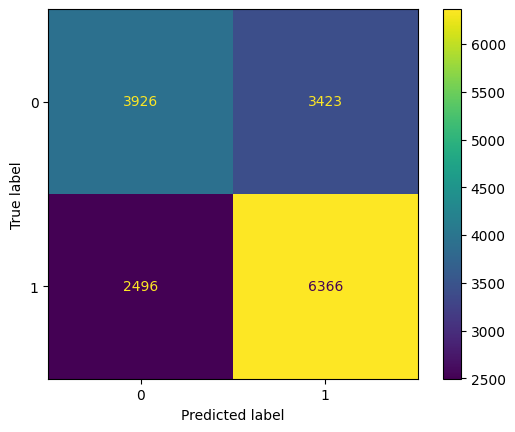

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_reg)

2. Decision Trees

In [146]:
# Create a decision tree classifier
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt*100:.2f}%")
print()

# Print classification report
print(classification_report(y_test, y_pred_dt))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 97.68%

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7349
           1       0.98      0.98      0.98      8862

    accuracy                           0.98     16211
   macro avg       0.98      0.98      0.98     16211
weighted avg       0.98      0.98      0.98     16211

Confusion Matrix:
[[7151  198]
 [ 178 8684]]


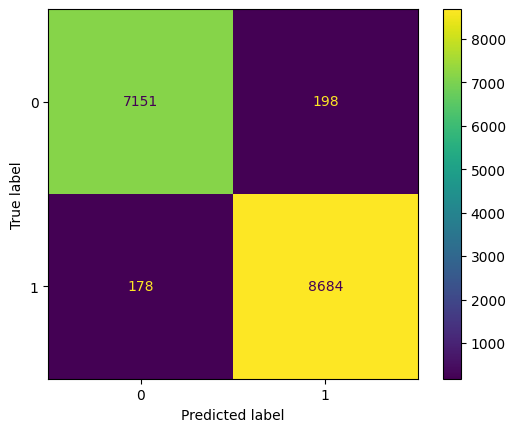

In [147]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

3. KNN

In [148]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
model_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Print the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn*100:.2f}%")

# Evaluate the model
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 98.84%
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211

[[7236  113]
 [  75 8787]]


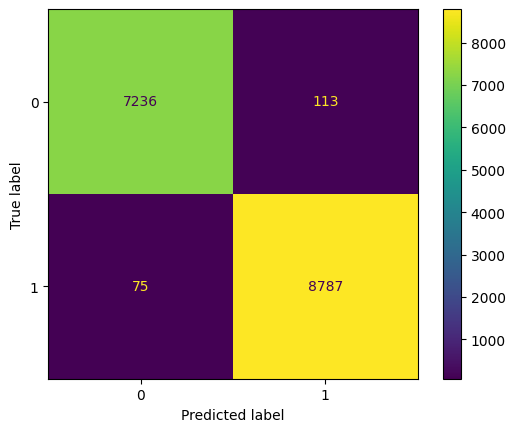

In [149]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

4. SVM

In [150]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM classifier
svm_model = SVC()

# Fit the classifier to the data
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy*100:.2f}%")

# Evaluate the model
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 90.16%
[[6569  780]
 [ 815 8047]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7349
           1       0.91      0.91      0.91      8862

    accuracy                           0.90     16211
   macro avg       0.90      0.90      0.90     16211
weighted avg       0.90      0.90      0.90     16211



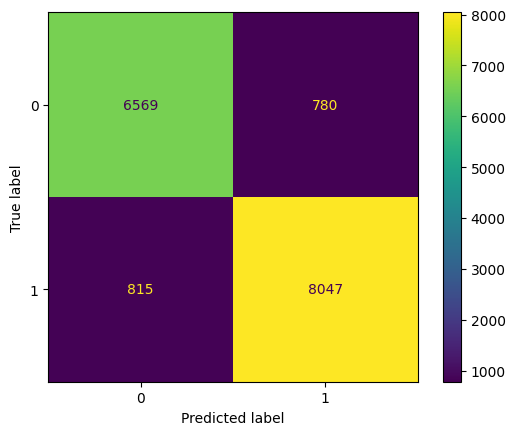

In [151]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

# 4. Insights and key findings


Let's plot some graphs in order to understand the performances of our different classification models on the Mushroom dataset. 

First, we look at the performances of each of our classification methods. 

1. Logistic Regression

The below graph is a ROC curve which represents the True Positive Rate (TPR) (y-axis) vs the False Positive Rate (FPR) (x-axis) for classification tresholds.

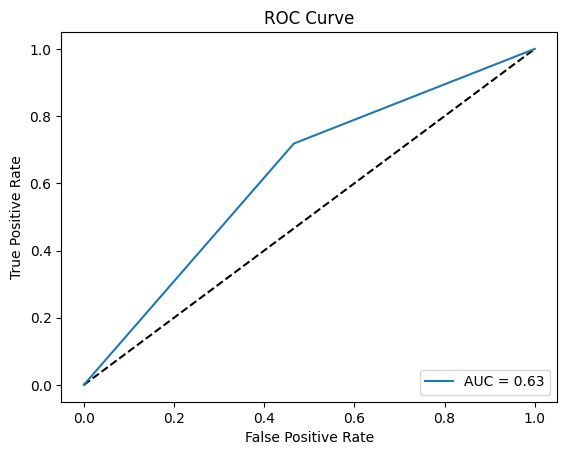

In [152]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_log_reg)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve above indicates that the Logistic Regression applied is good at distinguishing between positive and negative classes. 

Ideally, an ROC curve would lead to the top left corner of the graph. This indicates that a method is successful at identifying both positive and negative cases. 

In the ROC curve above, the curve goes up quickly at first and then starts to plateau. This indicates that the method is good at correctly identifying positive cases at first, but then there is a negative return as the threshold is adjusted.

The Area Under the Curve (AUC) is a numerical measure of how well the ROC curve distinguishes between positive and negative classes. It can range from 0 to 1, with a higher AUC score indicating better performance. The AUC calculated from the graph above gives a score of 0.63 which would not be considered as a successful score for a Logistic Regression algorithm. 

2. Decision Tree

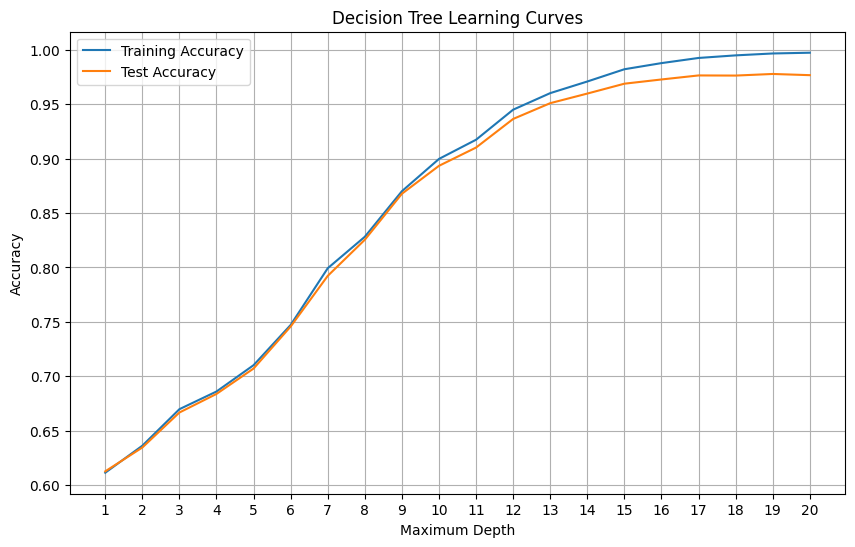

In [153]:
# Initialize lists to store training and validation accuracies
train_accuracies = []
test_accuracies = []

# Define a range of maximum depths to try
max_depths = range(1, 21)

# Train decision trees with different maximum depths
for depth in max_depths:
    # Create a decision tree classifier with the current maximum depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy on the training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.title('Decision Tree Learning Curves')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.grid(True)
plt.show()

The graph above is a representation of Accuracy vs Maximum Depth and it compares the performances of the Decision Tree for the Training and the Test datasets. 

There is a difference of almost 0.025 between the accuracy of training and test sets which is normal for this application and indicates that our model is not overfitting the dataset. 

If the test accuracy had a more significant difference compared to the accuracy of the training set that would show the model is overfitting and learned even the noises for the training set. Fortunately, this is not the case and our model seems to be working really well with an accuracy value of almost 98%.

3. K-NN

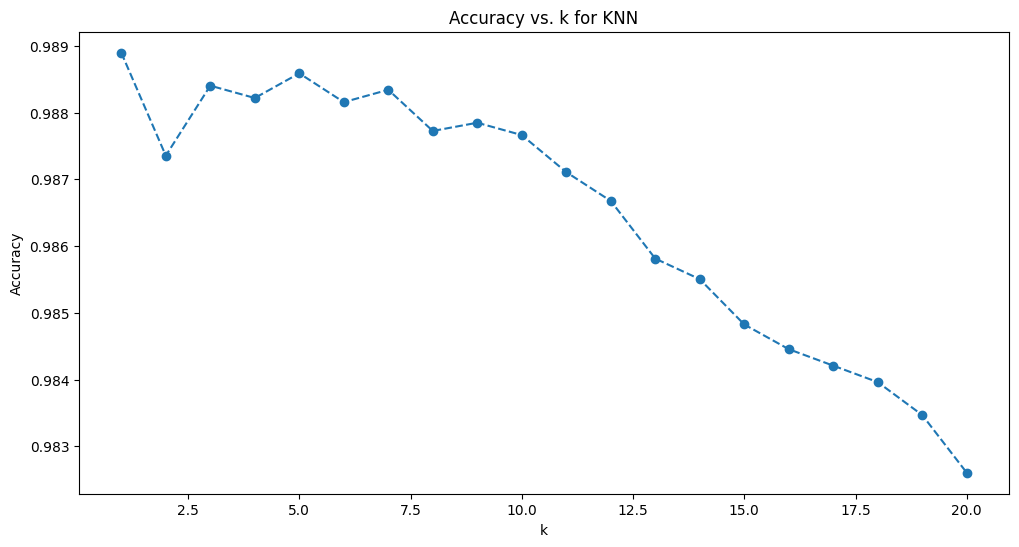

In [154]:
# List to hold the accuracy for each value of k
accuracy_list = []

# Range of k values to test
k_range = range(1, 21)

for k in k_range:
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn.predict(X_test)

    # Compute and store the accuracy for this value of k
    accuracy_list.append(accuracy_score(y_test, y_pred_knn))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_list, marker='o', linestyle='dashed')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN')
plt.show()

The graph above represents the accuracy scores as K value in K-NN increases from 1 to 20. As the graph indicates, the highest accuracy has been achieved by 1-NN but even when the K value is increased to 20, the accuracy just falls to 98%. 

Usually in a K-NN accuracy increases as K increases, until it reaches an optimal value and then starts to decline. This application having the highest accuracy with 1-NN is unusual. Combined with the fact that even with a significant increase in k (from 1 to 20), the accuracy only drops by 2%. This suggests the model might be focusing on the training data too much even learning the noises and extreme values, leading to good performance on the specific data points used for training, but potentially poor performance on unseen data.

4. SVM

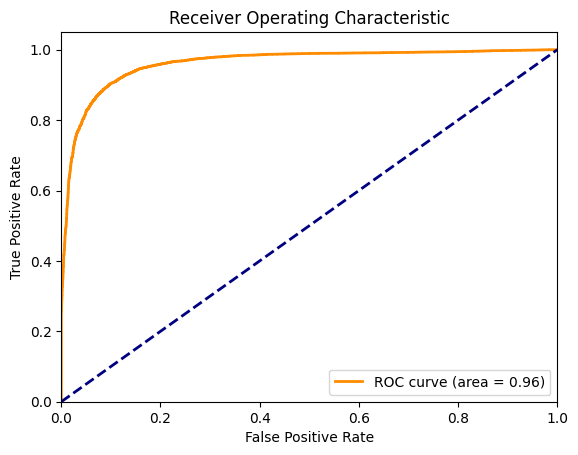

In [155]:
# Predict probabilities on your test data
y_score = svm_model.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve suggests the SVM model is doing a good job classifying between positive and negative cases. The covered area suggests a high Area Under the Curve (AUC), which is another positive sign about the performance of the SVM method on the dataset.

The accuracy of the SVM is 90% and the AUC of the ROC is 0.96 and both of these imply that the model is working successfully on the dataset.

- Precision vs Recall Curves

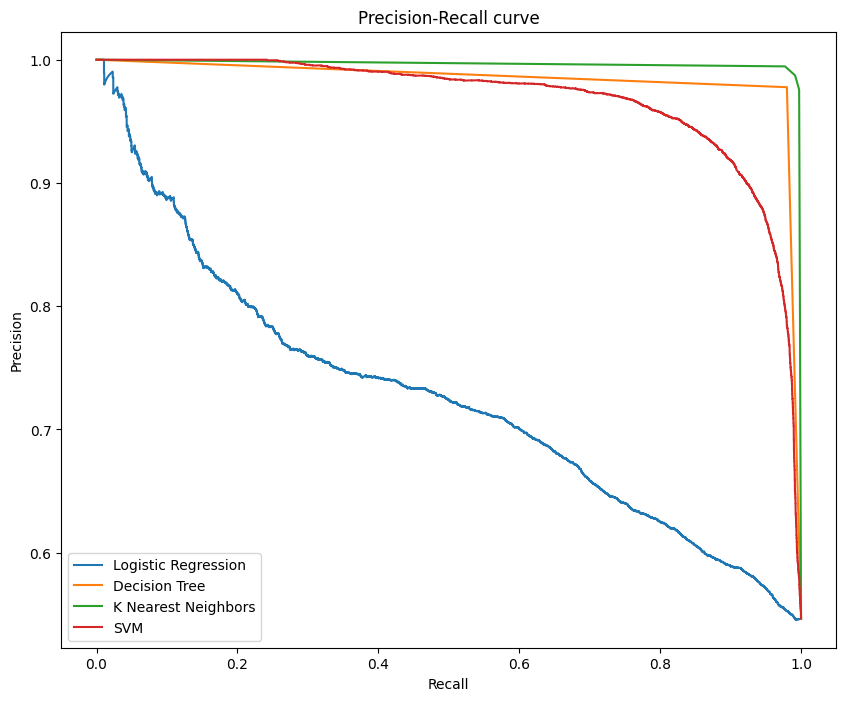

In [156]:
# Create classifiers
classifiers = {
    "Logistic Regression": model_log_reg,
    "Decision Tree": model_dt,
    "K Nearest Neighbors": model_knn,
    "SVM": SVC(probability=True) 
}

plt.figure(figsize=(10, 8))

# Calculate Precision-Recall curve for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall curve')
plt.show()

The precision-recall curve shows the performance of models. Overall it can be observed that logistic regression is performing weakly compared to the other models which show high rates at the necessary areas. 

Logistic Regression: Logistic regression appears to have the highest precision for a significant range of recall values. This means it's good at identifying true positives (minimizing false positives) across various thresholds.

SVM: SVM seems to have a good balance between precision and recall, achieving high recall while maintaining acceptable precision.

Decision Tree and KNN: Decision tree and KNN appear to have lower precision overall compared to logistic regression and SVM, suggesting they might return more false positives.

How to choose the right model depends on the desires for the dataset and what you want to output.

Precision: If minimizing false positives is crucial, logistic regression might be a good choice.
Recall: If maximizing recall is more important , SVM might be a better option.

- Accuracy Comparisons

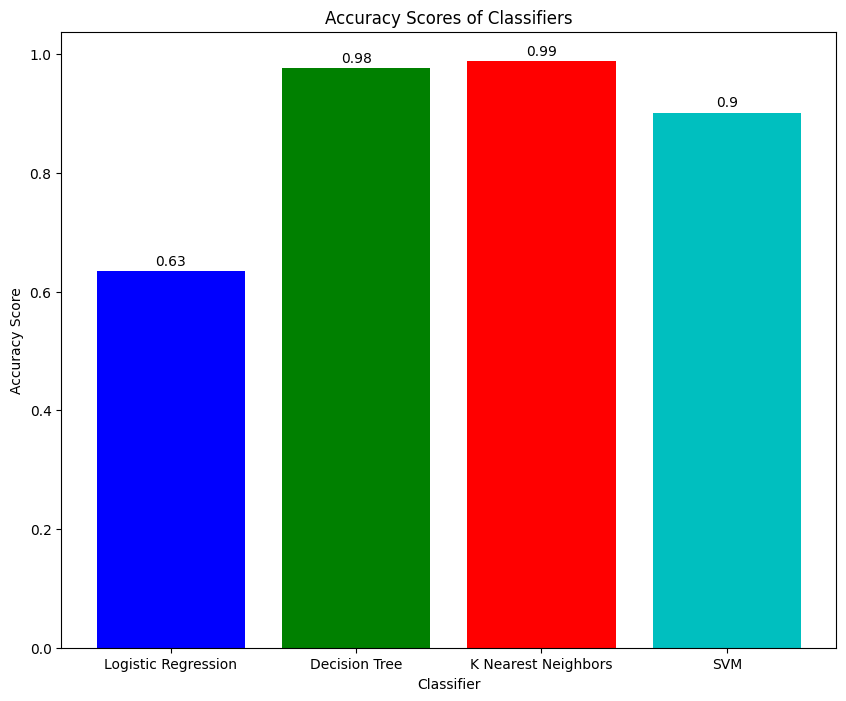

In [157]:
# Create classifiers
classifiers = {
    "Logistic Regression": model_log_reg,
    "Decision Tree": model_dt,
    "K Nearest Neighbors": model_knn,
    "SVM": SVC(probability=True)  # Add SVM classifier
}

# Initialize an empty dictionary for accuracy scores
accuracy_scores = {}

# Calculate accuracy score for each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Define a list of colors
colors = ['b', 'g', 'r', 'c']

# Plot accuracy scores in a bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)

# Annotate the bars with the accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classifiers')
plt.show()

Logistic Regression: Performed moderately on this dataset, which indicates even though the accuracy rate is lower compared to the others, LR is able to make true predictions to some extend. 

Decision Tree: Among with SVM, DT seems to be the best performing method on this dataset with an accuracy rate of 98%. The decision tree was able to understand how to differentiate the features of the mushroom dataset and succeeded.

K-NN: The accuracy rate here is misleading because even though K was increased to 20, the accuracy was above 98% and that shows the method overfit the data.

SVM: This method was a great success on predictiong the class for mushrooms on this dataset, extracted and understood the features well. 

# 5. Next Steps


In order to improve the performances of the methods used, we might take these steps:



1. Feature Engineering

    Analyze your features and consider creating new features that might be more informative for the classification task. Feature engineering can involve transformations, interactions, or combinations of existing features.





2. Hyperparameter Tuning

    Perform hyperparameter tuning using techniques like grid search or random search to find the optimal combination of hyperparameters for your logistic regression model. Explore different values for parameters like regularization strength (C) and penalty (l1 or l2).





3. Regularization

    Regularization techniques like L1 or L2 regularization can help prevent overfitting and improve generalization performance. Experiment with different values of the regularization strength (C) to find the best balance between bias and variance.





4. Ensemble Methods

    Explore ensemble methods like Random Forest or Gradient Boosting, which often yield higher accuracy compared to individual models. Consider using ensemble methods to combine multiple logistic regression models trained on different subsets of the data or with different hyperparameters.





5. Data Preprocessing

    Preprocess your data by handling missing values, encoding categorical variables, and removing outliers. Ensure that the preprocessing steps are applied consistently across different folds if using cross-validation. Additionally, consider feature scaling to ensure that features have similar scales.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
